<center>
<img src="logo.png" height="900"> 
</center>


# Контрольная работа :)

In [14]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot') # стиль для графиков
%matplotlib inline

В файле `cr.csv` лежат результаты контрольной работы, которая проводилась в Вышке на факультете "Э".  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!  

In [15]:
df = pd.read_csv('cr.csv', sep='\t')
print(df.shape)
df.head()

(389, 20)


,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


__Описание колонок:__


* `contest_login` - уникальный идентификатор студента
* `fraud` - в списывании скольки задач был уличён студент 
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

__а) Распределение результатов контрольной__ 

- Запишите все оценки за первую контрольную в переменную `x`, все пропуски удалите
- Найдите среднее и стандартное отклонение (используйте несмещённую оценку) 
- Постройте гистограмму результатов за первую контрольную 
- На этой же картинке постройте плотность нормального распределения со средним и стандартным отклонением, посчитанными выше

Похоже ли эмпирическое распределение на нормальное? 

Text(0.5, 1.0, 'Marks distribution')

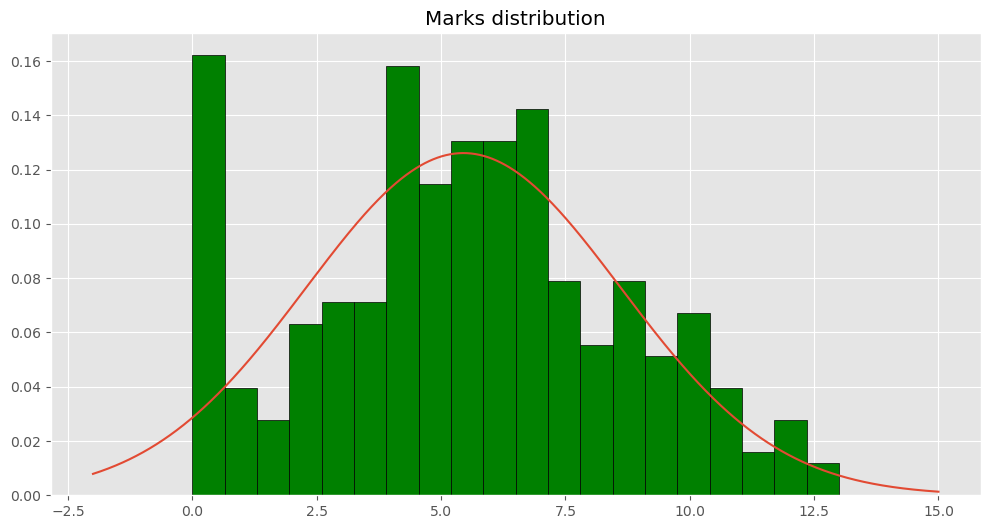

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

x = df['k1'].dropna()

x_mean = x.mean()
x_std = x.std(ddof=1)

x_norm = np.linspace(x.min() - 2, x.max() + 2, 1000)
y_norm = stats.norm(x_mean, x_std).pdf(x_norm)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(x_norm, y_norm)
ax.hist(x, bins=20, density=True, edgecolor='black', facecolor='green')
ax.set_title('Marks distribution')

In [17]:
# проверка, что среднее и стандартное откланение посчитаны корректно
assert np.abs(x_mean - 5.4478149100) < 1e-5

# похожие тесты на другие части задания скрыты от вас


По аналогии с тем, как это было сделано на лекции, проверьте с помощью теста Колмогорова-Смирнова гипотезу о нормальности: 

- Используйте функцию `kstest` из пакета `scipy`
- С помощью `.pvalue` вытащите из результатов теста p-значение, запишите его в переменную `pvalue`
- По аналогии запишите в `K` значение статистики Колмогорова
- Если p-значение оказалось больше $0.05$, гипотеза о нормальности данных не отвергается, и мы можем дальше использовать эту предпосылку

In [18]:
stats.kstest(x, 'norm', args=(x_mean, x_std)).pvalue

np.float64(0.2500068105451755)

In [77]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

K, p_value = stats.kstest(x, 'norm', args=(x_mean, x_std))

print('K value: {:.4f}, p-value: {:.4f}'.format(K, p_value))


K value: 0.0512, p-value: 0.2500


In [49]:
# проверка, что pvalue найдено корректно
assert np.abs(K - 0.051247) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений (никто не списывал контрольную друг у друга).

__б) Интервал для среднего.__ 

Постройте точный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную. В качестве оценки стандартного отклонения используйте несмещённый вариант, `ddof=1`. В переменные `left` и `right` запишите границы получившегося интервала. В переменную `delta` его ширину. 

In [ ]:
df['k1'].isna().sum()

np.int64(0)

In [98]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you



alpha = 0.05
n = len(x)

left, right = stats.t.interval(1 - alpha, df=n-1, loc=x_mean, scale=x_std/np.sqrt(n))

delta = right - left

print('Left: {}, right: {}, Delta: {}'.format(left, right, delta))

Left: 5.1324721374428055, right: 5.7631576826086075, Delta: 0.630685545165802


In [100]:
t = stats.t(df=n-1).ppf(q=0.975)

left = x_mean - t * x_std / np.sqrt(n)
right = x_mean + t * x_std / np.sqrt(n)
delta = right - left


print('Left: {}, right: {}, Delta: {}'.format(left, right, delta))

Left: 5.1324721374428055, right: 5.7631576826086075, Delta: 0.630685545165802


In [99]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 5.13247213744281) < 1e-5

# похожие тесты на другие части задания скрыты от вас


__в) Ангелы и демоны__

Переменная`fraud` - в списывании скольки задач был уличён студент. Разобьём наши наблюдения на две группы: Ангелы и Демоны. У Ангелов `fraud == 0`, у Демонов `fraud > 0`. 

Запишите оценки за первую контрольную для ангелов в переменную `angels`, для демонов в `demons`. Все пропуски из выборки удалите. Постройте на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

In [21]:
stats.kstest(df[df['fraud'] > 0]['k1'].dropna(), 'norm', args=(df[df['fraud'] > 0]['k1'].dropna().mean(), df[df['fraud'] > 0]['k1'].dropna().std()))

KstestResult(statistic=np.float64(0.05804408098727942), pvalue=np.float64(0.3550411674294185), statistic_location=np.float64(5.4), statistic_sign=np.int8(1))

In [13]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

angels = df[df['fraud'] == 0]['k1'].dropna()
demons = df[df['fraud'] > 0]['k1'].dropna()


sns.histplot(angels, bins=20, stat='density', label='angels')
sns.histplot(demons, bins=20, stat='density', label='demon')
plt.legend()


NameError: name 'df' is not defined

In [123]:
# проверка того, сколько в выборке оказалось ангелов и демонов
assert len(angels) == 109

# похожие тесты на другие части задания скрыты от вас


__г) Интервал для разницы средних__ 

Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов без предположения о равенстве дисперсий (интервал Уэлча). Для оценки всех дисперсий используйте несмещённый вариант. Заполните все переменные, перечисленные ниже. 

In [128]:
mu_diff = angels.mean() - demons.mean()
std_total = (angels.var(ddof=1) / len(angels) + demons.var(ddof=1) / len(demons)) ** (1/2)

In [135]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
num = (angels.var(ddof=1) / len(angels) + demons.var(ddof=1) / len(demons)) ** 2
disc = (angels.var(ddof=1) ** 2) / ((len(angels) ** 2) * (len(angels) - 1)) + (demons.var(ddof=1) ** 2) / ((len(demons) ** 2) * (len(demons) - 1))


nu =  num / disc       # число степеней свободы в распределении Стьюдента
left, right =  stats.t.interval(0.95, df=nu, loc=mu_diff, scale = std_total)     # левая граница интервала
delta = right - left

print('Mean diff: ', mu_diff)
print('Left: {}, right: {}, Delta: {}'.format(left, right, delta))

Mean diff:  -0.12879266055045946
Left: -0.8045581262764355, right: 0.5469728051755166, Delta: 1.3515309314519521


In [136]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.8045581262764373) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Входит ли в получившийся доверительный интервал ноль? Как думаете, что это означает? 

__д) Интервал для дисперсии__ 

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов. Постройте для отношения нервозности Демонов и Ангелов $95\%$ доверительный интервал. Для оценки всех дисперсий используйте несмещённый вариант. 

In [ ]:
stats.f.ppf(0.025, )

In [138]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you


alpha = 0.05
f_left, f_right = stats.f.ppf([0.025, 0.975], len(angels) - 1, len(demons) - 1)
left =  demons.var(ddof=1) / angels.var(ddof=1) * f_left    # левая граница интервала
right = demons.var(ddof=1) / angels.var(ddof=1) * f_right
delta = right - left


print('Ration: ', demons.var(ddof=1) / angels.var(ddof=1))
print('Left: {}, right: {}, Delta: {}'.format(left, right, delta))

Ration:  0.8521738891407348
Left: 0.6120428247687729, right: 1.1623835577954729, Delta: 0.5503407330267


In [139]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 0.6120428247687726) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Вошла ли в доверительный интервал единица? Как думаете, что это означает? 

__е) Ангелы и демоны решают задачки__ 

Нарисуйте картинку для корреляционной матрицы по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов. Пропуски заполните нулями. Будем считать, что если у студента нет оценки, он не выполнял это задание. Для подсчёта корреляций используйте метод `.corr`. Для отрисовки матриц функцию `heatmap` из пакета `seaborn`. Для ангелов неплохо подойдёт цветовая схема `YlGnBu`. Для демонов подходит схема `gist_heat_r`.

In [143]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

tasks = ['k1a', 'k1b', 'k1c', 'k1d', 'k1e', 'k1f']

# your code here


Text(0.5, 1.0, 'DEMONS')

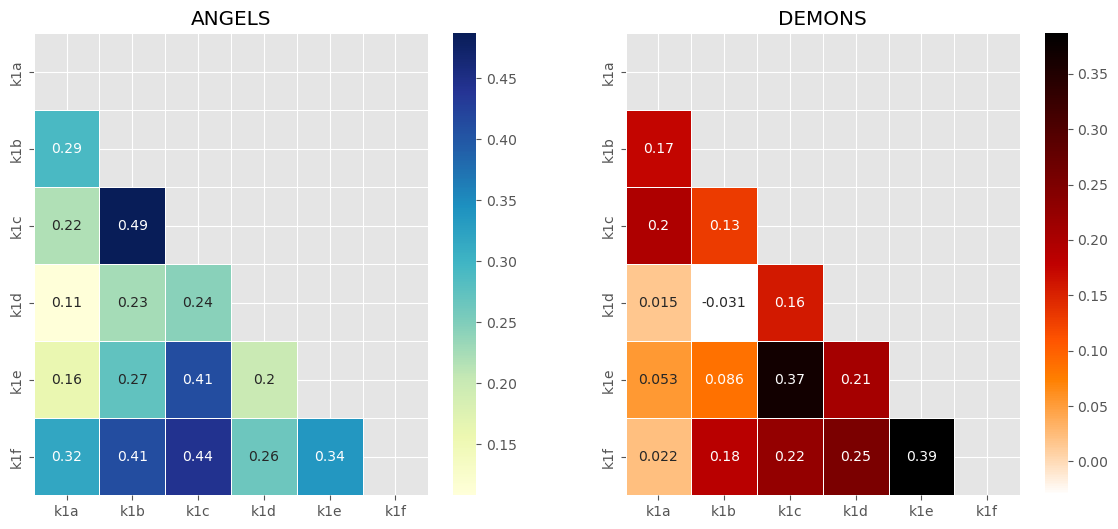

In [162]:
angels_corr = df.loc[lambda df: df.fraud == 0, tasks].fillna(value=0).corr()
demons_corr = df.loc[lambda df: df.fraud > 0, tasks].fillna(value=0).corr()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(angels_corr, mask=np.triu(np.ones_like(angels_corr)), annot=True, linewidth=.5, cmap='YlGnBu', ax=axes[0])
sns.heatmap(demons_corr, mask=np.triu(np.ones_like(demons_corr)), annot=True, linewidth=.5, cmap='gist_heat_r', ax=axes[1])


axes[0].set_title('ANGELS')
axes[1].set_title('DEMONS')


Между баллом за какие задачи самая высокая корреляция у Ангелов? В грейдер отправьте название колонок в порядке возрастания через запятую. __Например:__ `("k1a", "k1f")`. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

names_angels = ...
names_demons = ... 

# your code here


In [ ]:
# проверка вашего ответа скрыта от вас

Как думаете, какие задачи было тяжелее всего списать? 

__ё) Доля написавших третью контрольную.__

Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

У студентов был выбор: писать или не писать третью контрольную. Если в колонке `k3` стоит $0$, значит студент не стал это делать. Постройте асимптотический $95\%$-й доверительный интервал для разницы долей Ангелов и Демонов, которые решили писать третью контрольную. 

__Примечание:__ На практике, если мы пользуемся асимптотическими доверительными интервалами, мы можем искать границы двумя способами:

* __Первый__ состоит в том, что мы оцениваем стандартное отклонение с помощью $\sqrt{\hat{p} \cdot (1 - \hat{p})} = \sqrt{\frac{1}{n} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 
* __Второй способ__ состоит в том, чтобы оценить стандартное отклонение как  $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 

В плане асимптотики это не влияет на выводы, так как обе этих оценки состоятельно оценивают дисперсию. Можно пользоваться любым. Однако, чтобы с грейдером не было проблем и задание зачлось, воспользуйтесь первым способом. 

In [171]:
angels = df.loc[lambda df: df.fraud == 0, 'k3'].apply(lambda x: 1 if x > 0 else 0)
demons = df.loc[lambda df: df.fraud > 0, 'k3'].apply(lambda x: 1 if x > 0 else 0)

In [185]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you


mu_diff = angels.mean() - demons.mean()
var_angels = angels.mean() * (1 - angels.mean())
var_demons = demons.mean() * (1 - demons.mean())


left, right =  stats.norm.interval(0.95, loc=mu_diff, scale = np.sqrt(var_angels / len(angels) + var_demons / len(demons)))     # левая граница интервала
delta = right - left

print('Mean diff: ', mu_diff)
print('Left: {}, right: {}, Delta: {}'.format(left, right, delta))


# your code here


Mean diff:  -0.0775412844036697
Left: -0.1884946955049297, right: 0.03341212669759032, Delta: 0.22190682220252


In [186]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.1885) < 1e-3

# похожие тесты на другие части задания скрыты от вас


Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

__ж) Снова разница средних__ 

Посмотрим на результаты студентов в динамике. Постройте точный $95\%$ доверительный интервал для средней разницы оценок за вторую и первую контрольные. Пропуски в данных заполните нулями. 

In [207]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

k2 = df['k2'].fillna(0)
k1 = df['k1'].fillna(0)

diff = k2 - k1

mean_diff = diff.mean()
var_diff = diff.var(ddof=1)

left, right =  stats.t.interval(0.95, 
                                   df=len(diff) - 1, 
                                   loc=mean_diff, 
                                   scale = np.sqrt(var_diff / len(diff)))     # левая граница интервала
delta = right - left

print('Mean diff: ', mu_diff)
print('Left: {}, right: {}, Delta: {}'.format(left, right, delta))



# your code here


Mean diff:  -1.0817480719794341
Left: -1.4562881732820105, right: -0.7072079706768586, Delta: 0.749080202605152


In [208]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 1.4562881732820103) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

Это домашка подошла к концу. Поздравляю! Теперь вы умеете строить точные доверительные интервалы для нормальных выборок.

In [1]:
(20 * 50000 + 1100000) / 21

100000.0

In [2]:
def factorial(x):
    if x <= 1:
        return 1
    return x * factorial(x-1)

In [6]:
factorial(90) / factorial(100) * (factorial(90) / factorial(80))

0.33047621108672515

In [9]:
x_hat = 1200
std = 300
n = 100

stats.norm.interval(0.95, loc=x_hat, scale=std/np.sqrt(n))

(np.float64(1141.2010804637985), np.float64(1258.7989195362015))

In [12]:
p_hat = 0.39
std = np.sqrt(p_hat * (1 - p_hat))
n = 545
stats.norm.interval(0.98, loc=p_hat, scale=std/np.sqrt(n))

(np.float64(0.3413958191637113), np.float64(0.4386041808362887))

In [ ]:
with backet as (
    select 
    time,
    name,
    count(*) as "cnt"
    from example_table
    where event = 'ec.add_to_cart'
    group by time, name
),


